<h2>Redes Neurais XOR 
<br>
Aluno: Vitor Martins Soares<br>



O perceptron é um algoritmo muito simples que busca separar linearmente diferentes valores de entradas e seus resultados. Neste documento iremos mostrar a criação de funções que são utilizadas pelo perceptron e a aplicação real para classificação de uma porta lógica OR e uma XOR. Já adiantando, a porta OR ela é linearmente separável, o que trás um resultado agradável, já a porta XOR não é linearmente seperável, o que faz com que o resultado não consiga estabilizar, sempre ocorrendo erros.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import random

Este é a função de calculo de ajustes dos pesos no perceptron, apartir do erro, a taxa de aprendizado, o peso a ser recalculado e o valor de sua entrada, utiliza a forma: peso futuro é igual o peso antes do ajuste mais a multiplicação da taxa pelo erro e pelo valor de entrada do perceptron.

In [10]:
def ajustes(erro,taxa,pesos,lista):
  for x in range(0,len(lista)):
    pesos[x] = pesos[x]+(taxa*erro*lista[x])
  return pesos

Esta é a função de somatorio, o resultado desta função será enviado para a função de ativação, ela soma todas as multiplicações dos pesos pelos suas respectivas entradas, em alguns perceptron se usa o teta, ou o byas, o byas adiciona uma entrada que sempre é 1 e o peso desta entrada, o teta é um valor escolhido para subtrair da multiplicação do peso e a entrada, antes de somar todas as multiplicações de peso e entrada.

In [11]:
def somatorio(lista,pesos):
  soma=0
  for x in range(0,len(lista)):
    soma+=lista[x]*pesos[x]
  return soma

Esta é a função de ativação escolhida, é a função degrau, com todos os valores do somatorio sendo menores e iguais a 0.5 são 0, e todos maiores que 0.5 são 1.

In [12]:
def func_degrau2(a1):
  if(a1>1):
    return 1
  elif(a1<0):
    return 0 
  return a1

In [13]:
def func_degrau(a1):
  if(a1>0):
    return 1
  return 0

Aqui é criado o perceptron, onde existe 10 epocas para o treinamento e cada epoca passa por 4 amostras de valores 0 0, 0 1, 1 0 e 1 1, como estamos fazendo perceptron para treinamento de valores de OU, os casos 0 1, 1 0 e 1 1 deveriam retornar valores 1. No gráfico abaixo mostra os valores de erros, que depois da segunda epóca ele já estabiliza e acha os pesos corretos para esse perceptron, lembrando que a cada 4 treinamentos contabiliza 1 epoca. É possível perceber que foi um treinamento rápido por causa dos pesos iniciais iguais a 0 e a taxa de aprendizado 0.3.

Porém existe uma maneira para criar uma rede neural que aprende a porta XOR, para isso devemos ter mais de apenas 1 perceptron, neste caso iremos fazer, as 2 entradas, 1 camada de 2 perceptron no meio e a camada de saida, iremos utilizar também a mesma função de ativação para todos perceptron, a função degrau.

Aqui foi definidos as variáveis iniciais, elas são:


1.   Possibilidades de valores de entrada e saida.
2.   Pesos de cada Percepron, foi utilizado 2 camadas, 4 neurônios, uma camada com 3 neurônios e outra com 1, o neurônio final, de saída.
3.   Definimos também os bias a serem utilizados para cada um dos reurônios.
4.   Taxa de aprendizado.



In [14]:
lista = [[0,0,0],[0,1,1],[1,0,1],[1,1,0]]
pesos12 = [random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)]
pesos13 = [random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)]
pesos2345 = [random.uniform(0, 1),random.uniform(0, 1),random.uniform(0, 1)]
b12 = -1
b13 = -1
b2345 = -1
taxa = 0.5

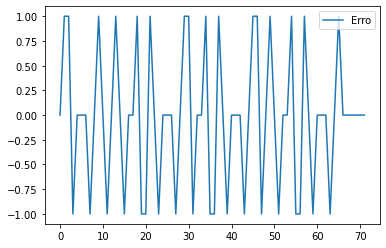

In [15]:
erros = list()
tempo = list()
listap121 = list()
listap122 = list()
listap123 = list()
listap131 = list()
listap132 = list()
listap133 = list()
listap23451 = list()
listap23452 = list()
listap23453 = list()
cont=0
for x in range(0,200):
  erroEpoca=0
  for y in lista:
    listap121.append(pesos12[0])
    listap122.append(pesos12[1])
    listap123.append(pesos12[2])
    listap131.append(pesos13[0])
    listap132.append(pesos13[1])
    listap133.append(pesos13[2])
    listap23451.append(pesos2345[0])
    listap23452.append(pesos2345[1])
    listap23453.append(pesos2345[2])
    # valor de cada perceptron antes de passar na função de ativação da camada oculta
    soma2 = somatorio((y[0],y[1],b12),pesos12)
    soma3 = somatorio((y[0],y[1],b13),pesos13)
    # valor dos perceptrons depois da função de ativação da camada oculta
    perceptron2 = func_degrau2(soma2) 
    perceptron3 = func_degrau2(soma3)
    # somatorio e função de ativação da camada final
    soma5 = somatorio((perceptron2,perceptron3,b2345),pesos2345)
    perceptron5 = func_degrau(soma5)
    # erro do valor esperado menos o valor previsto
    erro = y[2]-perceptron5
    # delta erro 1
    delta = erro*((1/np.cosh(soma5))**2)
    # deltas erros propagados
    delta2 = (delta*pesos2345[0])*((1/np.cosh(soma2))**2)
    delta3 = (delta*pesos2345[1])*((1/np.cosh(soma3))**2)
    # recalculo dos erros apartir da retropropagação
    pesos2345[0] += (perceptron2*delta*taxa)
    pesos2345[1] += (perceptron3*delta*taxa)
    pesos2345[2] += (b2345*delta*taxa)
    pesos12[0] += (y[0]*delta2*taxa)
    pesos12[1] += (y[1]*delta2*taxa)
    pesos12[2] += (b12*delta2*taxa)
    pesos13[0] += (y[0]*delta3*taxa)
    pesos13[1] += (y[1]*delta3*taxa)
    pesos13[2] += (b13*delta3*taxa)
    if(erro!=0):
      erroEpoca=1
    erros.append(erro)
    tempo.append(cont)
    cont+=1
  if(erroEpoca==0):
    break
plt.plot(tempo,erros,label="Erro")
plt.legend()
plt.show()

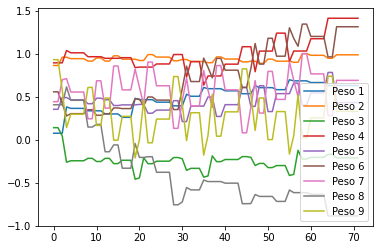

In [16]:
# listap121.append(pesos12[0])
#     listap122.append(pesos12[1])
#     listap123.append(pesos12[2])
#     listap131.append(pesos13[0])
#     listap132.append(pesos13[1])
#     listap133.append(pesos13[2])
#     listap23451.append(pesos2345[0])
#     listap23452.append(pesos2345[1])
#     listap23453.append(pesos2345[2])
plt.plot(tempo,listap121,label="Peso 1")
plt.plot(tempo,listap122,label="Peso 2")
plt.plot(tempo,listap123,label="Peso 3")
plt.plot(tempo,listap131,label="Peso 4")
plt.plot(tempo,listap132,label="Peso 5")
plt.plot(tempo,listap133,label="Peso 6")
plt.plot(tempo,listap23451,label="Peso 7")
plt.plot(tempo,listap23452,label="Peso 8")
plt.plot(tempo,listap23453,label="Peso 9")
plt.legend()
plt.show()

É Possível ver que apenas com 1 camada de perceptrons extra e 2 perceptrons dentro desta camada já é o suficiente para convergir e a rede neural aprender a porta lógica XOR, neste caso começamos sempre com pesos aleatórios de 0 a 1, e os byas tem sempre valor de -1, totalizando 3 pesos por perceptron. O Resultado foi o resultado esperado mas em algumas execuções foi possível ver que em algumas execuções os pesos não convergia para o resultado esperado, provavelmente  por erro do backpropagation e a lógica que ele é utilizado. Analisando outros códigos e outras maneiras de atualizar os pesos, como por exemplo algoritmos genéticos genéricos, é possível achar a melhor maneira de se atualizar os pesos, manéiras que são melhores que o backpropagation.